# Using Monte-Carlo Method to Compute $\pi$ #

One method to estimate the value of $\pi$ (3.141592...) is by using the Monte Carlo method. Assuming we have a circle of radius r=1, enclosed by a 2 × 2 square. The area of the circle is $\pi r^2=\pi$, the area of the square is 4. If we divide the area of the circle, by the area of the square we get $\pi /4$.

We then generate a large number of **uniformly distributed** random points and plot them on the graph. These points can be in any position within the square i.e. between (0,0) and (1,1). If they fall within the circle, they are coloured red, otherwise they are coloured blue. We keep track of the total number of points, and the number of points that are inside the circle. If we divide the number of points within the circle, Ninner by the total number of points, Ntotal, we should get a value that is an approximation of the ratio of the areas we calculated above, $\pi/4$.




In [1]:
# first import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## random number generators 
In any Monte-Carlo method, a key step is to generate the random numbers that suit the purpose. Often times, the results of the Monte-Carlo simulation depend critically on the quality of the randomw number. <br>

Numpy has a variety of random number generators. Let's take a quick look. 


### uniformly distributed random numbers

10000000
Wall time: 1.34 s


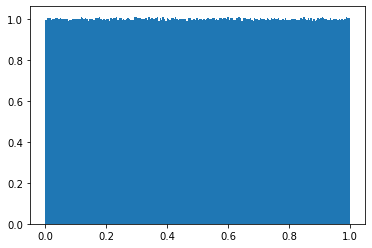

In [2]:
%%time
RN = np.random.random(int(1e7))
print(RN.size)
fig,ax = plt.subplots()
_=ax.hist(RN,bins='auto',density='True')



### normally distributed random numbers 

10000000


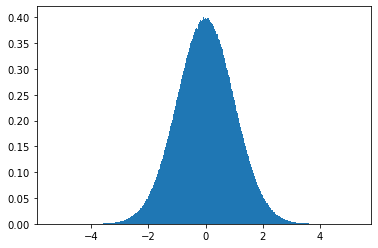

In [3]:
RN = np.random.randn(int(1e7))
print(RN.size)
fig,ax = plt.subplots()
_=ax.hist(RN,bins='auto',density='True')



## use Monte Carlo method to compute pi

100000 100000
[ True  True  True ...  True  True False]
estimated Pi and err 3.14656 0.1581155470468422
Wall time: 75.1 ms


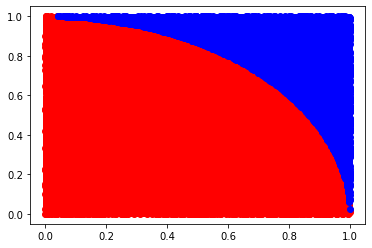

In [4]:
%%time
def PI_Monte_Carlo(Ntotal,plot_result = False):
    #Ntotal = 10000
    Ninside = 0
    x = np.random.random(Ntotal)
    y = np.random.random(Ntotal)
    r = np.sqrt(x**2+y**2)
    print(x.size,y.size)
    inside = r < 1.0
    print(inside)
    Ninside = np.sum(inside)
    Pinside = Ninside / Ntotal
    
    if plot_result:
        fig,ax = plt.subplots()
        ax.scatter(x[inside],y[inside],c='r')
        ax.scatter(x[~inside],y[~inside],c='b')
        
    return 4.0 * Pinside
pi_est = PI_Monte_Carlo(100000,plot_result=True) 
err = (pi_est-np.pi)/np.pi*100.0
print('estimated Pi and err',pi_est,err)

In [5]:
T=[True,False,True]
np.sum(T)

2

### Also Check this out:

In our calculation of $\pi$, we draw a figure with circle inscribed in a square with all of your random dot by using different colors for the dots inside and outside the circle.

The estimated value of pi is: 3.204


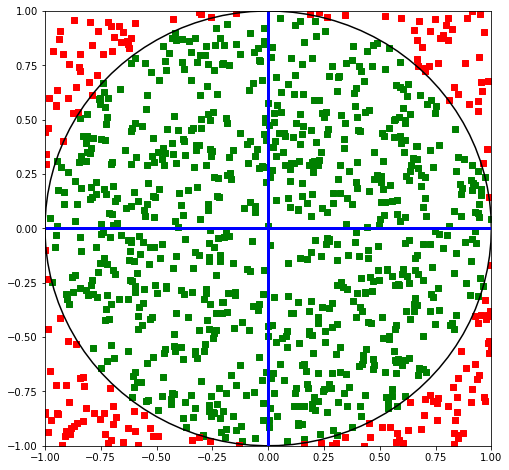

In [7]:
import matplotlib.pyplot as plt

from random import random

inside = 0
n = 1000
x_in = []
y_in = []
x_out = []
y_out = []

for i in range(n):
    x = 2*np.random.rand() -1  
    y = 2*np.random.rand() -1
    if x**2+y**2 <= 1:
        inside += 1
        x_in.append(x)
        y_in.append(y)
    else:
        x_out.append(x)
        y_out.append(y)

pi = 4*inside/n
print("The estimated value of pi is:",pi)

#to draw circle
theta = np.linspace(0, 2*np.pi,100)
r = 1
x1 = r*np.cos(theta)
x2 = r*np.sin(theta)
plt.figure(figsize=(8,8))
plt.plot(x1,x2,"black")

#plotting the hit points
plt.scatter(x_in, y_in, color='g', marker='s')
plt.scatter(x_out, y_out, color='r', marker='s')

#axes limit
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.axvline(x = 0, color='blue',lw=3)

plt.axhline(y = 0, color='blue',lw=3)
